# Agrupamiento (Clustering)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.datasets import make_blobs, make_circles
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# Definamos el "random_state" para que los resultados sean reproducibles:
random_state=42

## Ejemplo Práctico

Para los datasets planteados realice el siguiente proceso de clustering:

- Halle y grafique los clusters resultantes de aplicar K-medias con $K = 2$.
- Encuentre un buen valor de K mediante el método del codo y grafique los nuevos clusters.
- Halle la inercia en cada caso.


### Dataset 1

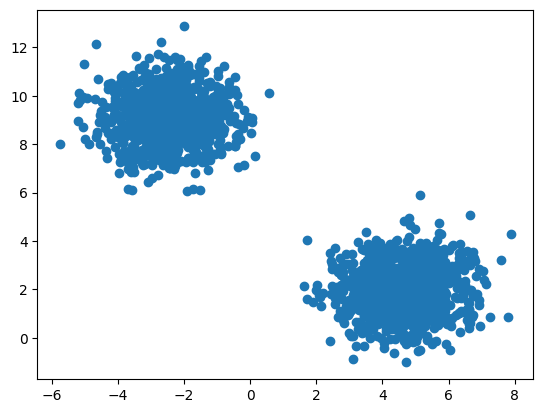

In [3]:
data, _ = make_blobs(n_samples=2000, n_features=2, centers=2, random_state=random_state)
plt.scatter(data[:,0], data[:,1])
plt.show()


In [4]:
#Definir el pipeline de pre-procesamiento
pipe = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("clustering",KMeans(n_clusters=2))
        ]
)

In [5]:
#Entrenamos
pipe.fit(data)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clustering', KMeans(n_clusters=2))])

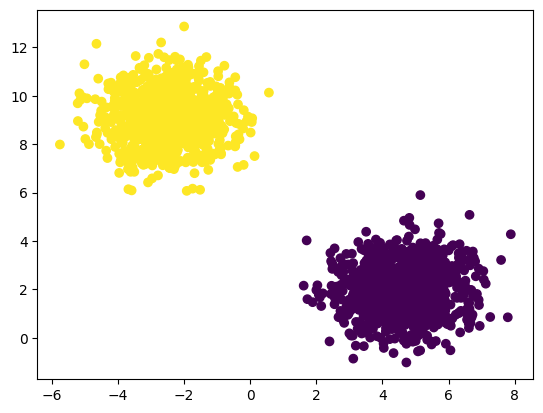

In [6]:
plt.scatter(data[:,0], data[:,1], c=pipe['clustering'].labels_)
plt.show()

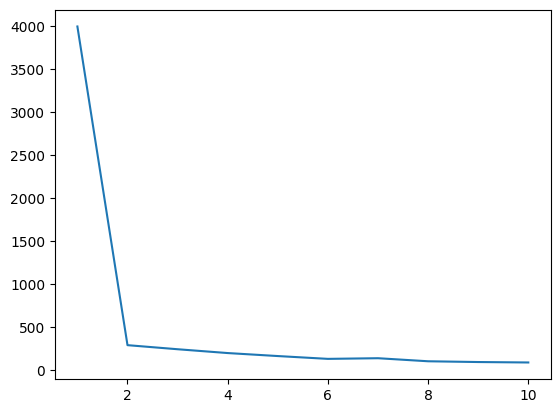

In [7]:
inert = []
k_range = list(range(1, 11))
for k in k_range:
    clu_kmeans = Pipeline(steps=[("scaler", StandardScaler()), ("clustering",KMeans(n_clusters=k))])
    clu_kmeans.fit(data)
    inert.append(clu_kmeans['clustering'].inertia_)
    
plt.plot(k_range, inert)
plt.show()

Daado que el "codo" está en $K = 2$, no aplicaremos K-medias de nuevo.

### Dataset 2

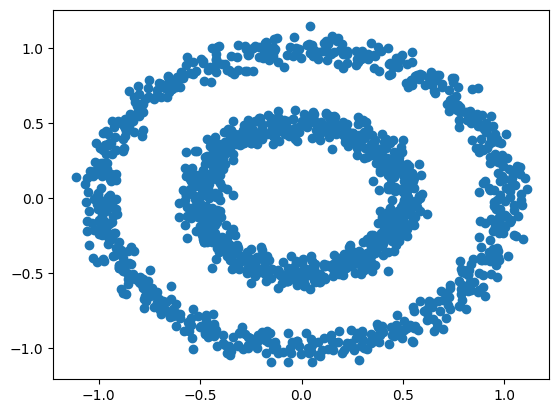

In [8]:
data, _ = make_circles(
    n_samples=1500,
    factor=.5,
    noise=.05,
    random_state=random_state
)

plt.scatter(data[:,0], data[:,1])
plt.show()

In [9]:
#Definimos el Pipeline de clustering con K = 2
clu_kmeans = Pipeline(steps=[("scaler", StandardScaler()), ("clustering",KMeans(n_clusters=2))])
clu_kmeans.fit(data)
print(f'Con K = 2: la inercia es {clu_kmeans["clustering"].inertia_}')

Con K = 2: la inercia es 1910.5833045400313


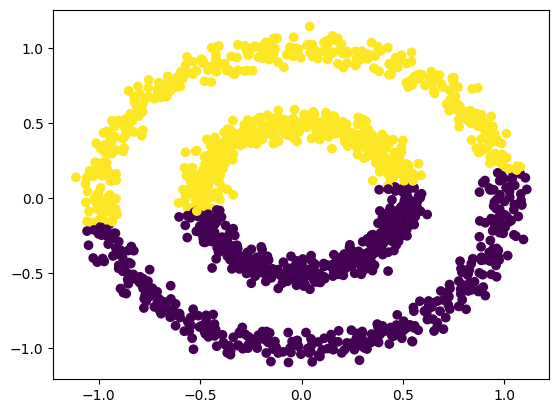

In [10]:
plt.scatter(data[:,0], data[:,1], c=clu_kmeans["clustering"].labels_)
plt.show()

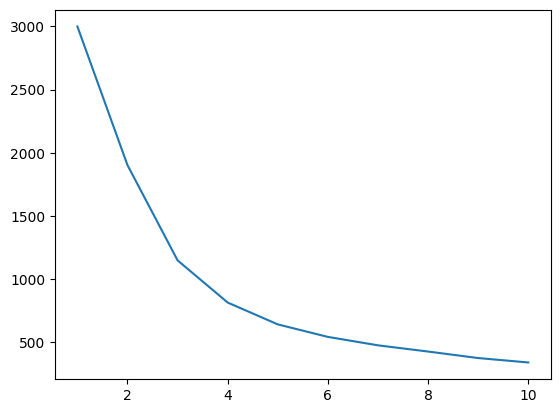

In [11]:
inert = []
k_range = list(range(1, 11))
for k in k_range:
    clu_kmeans = Pipeline(steps=[("scaler", StandardScaler()), ("clustering",KMeans(n_clusters=k))])
    clu_kmeans.fit(data)
    inert.append(clu_kmeans['clustering'].inertia_)
    
plt.plot(k_range, inert)
plt.show()

El "codo" está en $K = 4$.

In [12]:
#Definimos el Pipeline de clustering con K = 4
clu_kmeans = Pipeline(steps=[("scaler", StandardScaler()), ("clustering",KMeans(n_clusters=4))])
clu_kmeans.fit(data)
print(f'Con K = 4: la inercia es {clu_kmeans["clustering"].inertia_}')

Con K = 4: la inercia es 816.1141538937567


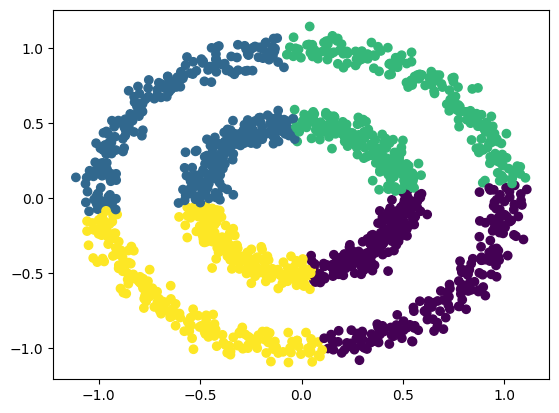

In [13]:
plt.scatter(data[:,0], data[:,1], c=clu_kmeans["clustering"].labels_)
plt.show()

In [14]:
#Definimos el Pipeline de clustering con K = 2
clu_dbscan = Pipeline(steps=[("clustering",DBSCAN(eps=0.2, min_samples=10))])
clu_dbscan.fit(data)

Pipeline(steps=[('clustering', DBSCAN(eps=0.2, min_samples=10))])

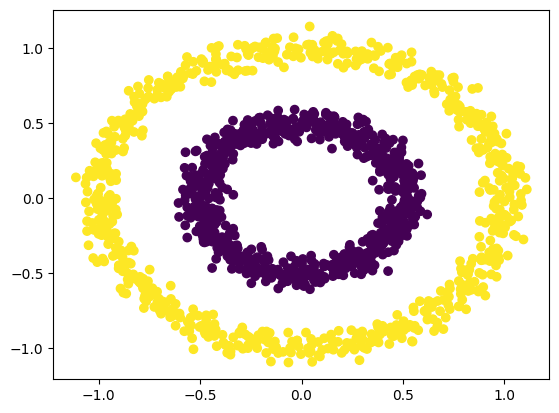

In [15]:
plt.scatter(data[:,0], data[:,1], c=clu_dbscan["clustering"].labels_)
plt.show()